In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('dog/dogs-ranking-dataset.csv')

In [4]:
df2 = pd.read_csv('dog/dog_breeds.csv')

In [7]:
df2.rename(columns={'breed':'품종'},inplace=True)

In [8]:
df2.columns

Index(['품종', 'origin', 'url', 'img', 'height', 'weight', 'coat', 'life_span',
       'other_names', 'common_nicknames', 'colour', 'litter_size', 'notes',
       'breed_status', 'foundation_stock', 'img_src_set.1.5x',
       'img_src_set.2x', 'height.dogs', 'weight.dogs', 'height.bitches',
       'weight.bitches', 'img_src_set'],
      dtype='object')

In [11]:
df2.rename(columns={'url':'정보링크', 'img':'이미지'},inplace=True)

In [14]:
df2 = df2[['품종', '정보링크', '이미지']]

In [17]:
df = df[df['품종'].isin(df2['품종'])].merge(df2, left_on='품종',right_on='품종', how='inner')

In [18]:
df

,품종,유형,점수,인기순위,지능,선천적질병,어린이를 위한 점수,크기,평생비용,지능순위,지능%,수명(년),유전적 질병의 수,유전적 질병,평균구매가격,연간 사료비용,손질빈도,어린이 적합성,정보링크,이미지
0,Border Terrier,terrier,3.61,61,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1,https://en.wikipedia.org/wiki/Border_Terrier,https://upload.wikimedia.org/wikipedia/commons...
1,Cairn Terrier,terrier,3.53,48,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1,https://en.wikipedia.org/wiki/Cairn_Terrier,https://upload.wikimedia.org/wikipedia/commons...
2,Siberian Husky,working,3.22,16,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1,https://en.wikipedia.org/wiki/Siberian_Husky,https://upload.wikimedia.org/wikipedia/commons...
3,Welsh Springer Spaniel,sporting,3.34,81,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1,https://en.wikipedia.org/wiki/Welsh_Springer_S...,https://upload.wikimedia.org/wikipedia/commons...
4,English Cocker Spaniel,sporting,3.33,51,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1,https://en.wikipedia.org/wiki/English_Cocker_S...,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Alaskan Malamute,working,1.82,47,Average,"hip problems, dwarfism",2.57,large,"$21,986",50,36%,10.67,2,"hip problems, dwarfism","$1,210",$710,Daily,2,https://en.wikipedia.org/wiki/Alaskan_Malamute,https://upload.wikimedia.org/wikipedia/commons...
78,Bloodhound,hound,1.66,42,Lowest,"fatal stomach bloat, skin problems",2.54,large,"$13,824",75,7%,6.75,2,"fatal stomach bloat, skin problems",$608,$710,Once a week,2,https://en.wikipedia.org/wiki/Bloodhound,https://upload.wikimedia.org/wikipedia/commons...
79,Chow Chow,non-sporting,1.76,54,Lowest,"eye, hip problems",2.51,medium,"$15,898",77,5%,9.01,2,"eye, hip problems",$515,$466,Daily,2,https://en.wikipedia.org/wiki/Chow_Chow,https://upload.wikimedia.org/wikipedia/commons...
80,Akita,working,1.95,41,Average,hip problems,2.33,large,"$20,994",54,31%,10.16,1,hip problems,"$1,202",$710,Once a week,3,https://en.wikipedia.org/wiki/Akita_(dog),https://upload.wikimedia.org/wikipedia/commons...


In [19]:
intelligence_levels = {
        "Lowest": 0,  # 최하
        "Fair": 1,       # 낮음
        "Average": 2,   # 평균
        "Above average": 3,      # 평균 이상
        "Brightest": 4,  # 뛰어남
        "Excellent": 5 # 최고
    }
df["지능"] = df["지능"].map(intelligence_levels)

size_levels = {
        "small": 0,
        "medium": 1,
        "large": 2
    }
df['크기'] = df['크기'].map(size_levels)


In [20]:
df

,품종,유형,점수,인기순위,지능,선천적질병,어린이를 위한 점수,크기,평생비용,지능순위,지능%,수명(년),유전적 질병의 수,유전적 질병,평균구매가격,연간 사료비용,손질빈도,어린이 적합성,정보링크,이미지
0,Border Terrier,terrier,3.61,61,3,none,4.99,0,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1,https://en.wikipedia.org/wiki/Border_Terrier,https://upload.wikimedia.org/wikipedia/commons...
1,Cairn Terrier,terrier,3.53,48,3,"'lion jaw', heart problems",4.91,0,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1,https://en.wikipedia.org/wiki/Cairn_Terrier,https://upload.wikimedia.org/wikipedia/commons...
2,Siberian Husky,working,3.22,16,2,none,4.72,1,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1,https://en.wikipedia.org/wiki/Siberian_Husky,https://upload.wikimedia.org/wikipedia/commons...
3,Welsh Springer Spaniel,sporting,3.34,81,3,hip problems,4.71,1,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1,https://en.wikipedia.org/wiki/Welsh_Springer_S...,https://upload.wikimedia.org/wikipedia/commons...
4,English Cocker Spaniel,sporting,3.33,51,5,none,4.70,1,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1,https://en.wikipedia.org/wiki/English_Cocker_S...,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Alaskan Malamute,working,1.82,47,2,"hip problems, dwarfism",2.57,2,"$21,986",50,36%,10.67,2,"hip problems, dwarfism","$1,210",$710,Daily,2,https://en.wikipedia.org/wiki/Alaskan_Malamute,https://upload.wikimedia.org/wikipedia/commons...
78,Bloodhound,hound,1.66,42,0,"fatal stomach bloat, skin problems",2.54,2,"$13,824",75,7%,6.75,2,"fatal stomach bloat, skin problems",$608,$710,Once a week,2,https://en.wikipedia.org/wiki/Bloodhound,https://upload.wikimedia.org/wikipedia/commons...
79,Chow Chow,non-sporting,1.76,54,0,"eye, hip problems",2.51,1,"$15,898",77,5%,9.01,2,"eye, hip problems",$515,$466,Daily,2,https://en.wikipedia.org/wiki/Chow_Chow,https://upload.wikimedia.org/wikipedia/commons...
80,Akita,working,1.95,41,2,hip problems,2.33,2,"$20,994",54,31%,10.16,1,hip problems,"$1,202",$710,Once a week,3,https://en.wikipedia.org/wiki/Akita_(dog),https://upload.wikimedia.org/wikipedia/commons...


In [21]:
breed_mapping = {
        "Border Terrier": "보더 테리어",
        "Cairn Terrier": "케언 테리어",
        "Siberian Husky": "시베리안 허스키",
        "Welsh Springer Spaniel": "웨일스 스프링거 스패니얼",
        "English Cocker Spaniel": "잉글리시 코커 스패니얼",
        "Cocker Spaniel": "코커 스패니얼",
        "Lhasa Apso": "라사 압소",
        "English Springer Spaniel": "잉글리시 스프링거 스패니얼",
        "Shetland Sheepdog": "셰틀랜드 쉽독 (셸티)",
        "West Highland White Terrier": "웨스트 하이랜드 화이트 테리어 (웨스티)",
        "Brittany": "브리타니 스패니얼",
        "German Shorthaired Pointer": "저먼 쇼트헤어드 포인터",
        "Pointer": "포인터",
        "Tibetan Spaniel": "티베탄 스패니얼",
        "Labrador Retriever": "래브라도 리트리버",
        "Bichon Frise": "비숑 프리제",
        "Irish Setter": "아이리시 세터",
        "Samoyed": "사모예드",
        "Shih Tzu": "시추",
        "Golden Retriever": "골든 리트리버",
        "Chesapeake Bay Retriever": "체서피크 베이 리트리버",
        "Papillon": "파피용",
        "Gordon Setter": "고든 세터",
        "English Setter": "잉글리시 세터",
        "Pug": "퍼그",
        "Affenpinscher": "아펜핀셔",
        "Miniature Schnauzer": "미니어처 슈나우저",
        "Beagle": "비글",
        "Border Collie": "보더 콜리",
        "Australian Terrier": "오스트레일리안 테리어",
        "Whippet": "휘핏",
        "Boston Terrier": "보스턴 테리어",
        "Briard": "브리아드",
        "Bedlington Terrier": "베들링턴 테리어",
        "Cavalier King Charles Spaniel": "카발리에 킹 찰스 스패니얼",
        "Dalmatian": "달마시안",
        "Flat-Coated Retriever": "플랫코티드 리트리버",
        "Belgian Tervuren": "벨지안 터뷰런",
        "Basset Hound": "바셋 하운드",
        "Poodle": "푸들",
        "Staffordshire Bull Terrier": "스태퍼드셔 불 테리어",
        "Bouvier des Flandres": "부비에 데 플랑드르",
        "Pembroke Welsh Corgi": "펨브록 웰시 코기",
        "Clumber Spaniel": "클럼버 스패니얼",
        "Pomeranian": "포메라니안",
        "Australian Shepherd": "오스트레일리안 셰퍼드",
        "Pharaoh Hound": "파라오 하운드",
        "Dandie Dinmont Terrier": "댄디 딘몬트 테리어",
        "Greyhound": "그레이하운드",
        "Saluki": "살루키",
        "Australian Cattle Dog": "오스트레일리안 캐틀독",
        "Tibetan Terrier": "티베탄 테리어",
        "Norfolk Terrier": "노퍽 테리어",
        "Dachshund": "닥스훈트",
        "Chihuahua": "치와와",
        "Doberman Pinscher": "도베르만 핀셔",
        "English Toy Spaniel": "잉글리시 토이 스패니얼",
        "Newfoundland": "뉴펀들랜드",
        "Basenji": "바센지",
        "Afghan Hound": "아프간 하운드",
        "Old English Sheepdog": "올드 잉글리시 쉽독",
        "French Bulldog": "프렌치 불독",
        "Bernese Mountain Dog": "버니즈 마운틴 독",
        "Boxer": "복서",
        "Brussels Griffon": "브뤼셀 그리펀",
        "Maltese": "몰티즈",
        "Giant Schnauzer": "자이언트 슈나우저",
        "Rottweiler": "로트와일러",
        "Yorkshire Terrier": "요크셔 테리어",
        "Irish Wolfhound": "아이리시 울프하운드",
        "Scottish Terrier": "스코티시 테리어",
        "Bullmastiff": "불마스티프",
        "German Shepherd": "저먼 셰퍼드",
        "Mastiff": "마스티프",
        "Great Dane": "그레이트 데인",
        "Kerry Blue Terrier": "케리 블루 테리어",
        "Italian Greyhound": "이탈리안 그레이하운드",
        "Pekingese": "페키니즈",
        "Rhodesian Ridgeback": "로디시안 리지백",
        "Bull Terrier": "불 테리어",
        "Saint Bernard": "세인트 버나드",
        "Borzoi": "보르조이",
        "Alaskan Malamute": "알래스칸 말라뮤트",
        "Bloodhound": "블러드하운드",
        "Chow Chow": "차우차우",
        "Akita": "아키타",
        "Bulldog": "불독"
    }
df['품종'] = df['품종'].map(breed_mapping)

In [22]:
df

,품종,유형,점수,인기순위,지능,선천적질병,어린이를 위한 점수,크기,평생비용,지능순위,지능%,수명(년),유전적 질병의 수,유전적 질병,평균구매가격,연간 사료비용,손질빈도,어린이 적합성,정보링크,이미지
0,보더 테리어,terrier,3.61,61,3,none,4.99,0,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1,https://en.wikipedia.org/wiki/Border_Terrier,https://upload.wikimedia.org/wikipedia/commons...
1,케언 테리어,terrier,3.53,48,3,"'lion jaw', heart problems",4.91,0,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1,https://en.wikipedia.org/wiki/Cairn_Terrier,https://upload.wikimedia.org/wikipedia/commons...
2,시베리안 허스키,working,3.22,16,2,none,4.72,1,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1,https://en.wikipedia.org/wiki/Siberian_Husky,https://upload.wikimedia.org/wikipedia/commons...
3,웨일스 스프링거 스패니얼,sporting,3.34,81,3,hip problems,4.71,1,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1,https://en.wikipedia.org/wiki/Welsh_Springer_S...,https://upload.wikimedia.org/wikipedia/commons...
4,잉글리시 코커 스패니얼,sporting,3.33,51,5,none,4.70,1,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1,https://en.wikipedia.org/wiki/English_Cocker_S...,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,알래스칸 말라뮤트,working,1.82,47,2,"hip problems, dwarfism",2.57,2,"$21,986",50,36%,10.67,2,"hip problems, dwarfism","$1,210",$710,Daily,2,https://en.wikipedia.org/wiki/Alaskan_Malamute,https://upload.wikimedia.org/wikipedia/commons...
78,블러드하운드,hound,1.66,42,0,"fatal stomach bloat, skin problems",2.54,2,"$13,824",75,7%,6.75,2,"fatal stomach bloat, skin problems",$608,$710,Once a week,2,https://en.wikipedia.org/wiki/Bloodhound,https://upload.wikimedia.org/wikipedia/commons...
79,차우차우,non-sporting,1.76,54,0,"eye, hip problems",2.51,1,"$15,898",77,5%,9.01,2,"eye, hip problems",$515,$466,Daily,2,https://en.wikipedia.org/wiki/Chow_Chow,https://upload.wikimedia.org/wikipedia/commons...
80,아키타,working,1.95,41,2,hip problems,2.33,2,"$20,994",54,31%,10.16,1,hip problems,"$1,202",$710,Once a week,3,https://en.wikipedia.org/wiki/Akita_(dog),https://upload.wikimedia.org/wikipedia/commons...


In [23]:
df.columns

Index(['품종', '유형', '점수', '인기순위', '지능', '선천적질병', '어린이를 위한 점수', '크기', '평생비용',
       '지능순위', '지능%', '수명(년)', '유전적 질병의 수', '유전적 질병', '평균구매가격', '연간 사료비용',
       '손질빈도', '어린이 적합성', '정보링크', '이미지'],
      dtype='object')

In [24]:
df['평균구매가격'] = df['평균구매가격'].replace('[\$,]', '', regex=True).astype(float)
df['평생비용'] = df['평생비용'].replace('[\$,]', '', regex=True).astype(float)
df['연간 사료비용'] = df['연간 사료비용'].replace('[\$,]', '', regex=True).astype(float)

In [26]:
df.head(2)

,품종,유형,점수,인기순위,지능,선천적질병,어린이를 위한 점수,크기,평생비용,지능순위,지능%,수명(년),유전적 질병의 수,유전적 질병,평균구매가격,연간 사료비용,손질빈도,어린이 적합성,정보링크,이미지
0,보더 테리어,terrier,3.61,61,3,none,4.99,0,22638.0,30,70%,14.00,0,none,833.0,324.0,Once a week,1,https://en.wikipedia.org/wiki/Border_Terrier,https://upload.wikimedia.org/wikipedia/commons...
1,케언 테리어,terrier,3.53,48,3,"'lion jaw', heart problems",4.91,0,21992.0,35,61%,13.84,2,"'lion jaw', heart problems",435.0,324.0,Once a week,1,https://en.wikipedia.org/wiki/Cairn_Terrier,https://upload.wikimedia.org/wikipedia/commons...


In [27]:
from forex_python.converter import CurrencyRates
import requests

In [28]:
def get_usd_to_krw():
    url = "https://api.exchangerate-api.com/v4/latest/USD"
    response = requests.get(url)
    data = response.json()
    return data["rates"]["KRW"]

In [29]:
# 환율 가져오기
rate = get_usd_to_krw()

In [30]:
# '평균구매가격' 컬럼 변환 (달러 → 원화)
df['평균구매가격'] = df['평균구매가격'] * rate
df['연간 사료비용']= df['연간 사료비용'] * rate
df['평생비용']= df['평생비용'] * rate

In [31]:
df

,품종,유형,점수,인기순위,지능,선천적질병,어린이를 위한 점수,크기,평생비용,지능순위,지능%,수명(년),유전적 질병의 수,유전적 질병,평균구매가격,연간 사료비용,손질빈도,어린이 적합성,정보링크,이미지
0,보더 테리어,terrier,3.61,61,3,none,4.99,0,32887807.26,30,70%,14.00,0,none,1210157.41,470697.48,Once a week,1,https://en.wikipedia.org/wiki/Border_Terrier,https://upload.wikimedia.org/wikipedia/commons...
1,케언 테리어,terrier,3.53,48,3,"'lion jaw', heart problems",4.91,0,31949317.84,35,61%,13.84,2,"'lion jaw', heart problems",631954.95,470697.48,Once a week,1,https://en.wikipedia.org/wiki/Cairn_Terrier,https://upload.wikimedia.org/wikipedia/commons...
2,시베리안 허스키,working,3.22,16,2,none,4.72,1,32032125.73,45,45%,12.58,0,none,944300.50,676990.82,Once in a few weeks,1,https://en.wikipedia.org/wiki/Siberian_Husky,https://upload.wikimedia.org/wikipedia/commons...
3,웨일스 스프링거 스패니얼,sporting,3.34,81,3,hip problems,4.71,1,29380820.48,31,69%,12.49,1,hip problems,1089577.50,470697.48,Once a week,1,https://en.wikipedia.org/wiki/Welsh_Springer_S...,https://upload.wikimedia.org/wikipedia/commons...
4,잉글리시 코커 스패니얼,sporting,3.33,51,5,none,4.70,1,27592460.61,18,82%,11.66,0,none,1162216.00,470697.48,Once a week,1,https://en.wikipedia.org/wiki/English_Cocker_S...,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,알래스칸 말라뮤트,working,1.82,47,2,"hip problems, dwarfism",2.57,2,31940601.22,50,36%,10.67,2,"hip problems, dwarfism",1757851.70,1031466.70,Daily,2,https://en.wikipedia.org/wiki/Alaskan_Malamute,https://upload.wikimedia.org/wikipedia/commons...
78,블러드하운드,hound,1.66,42,0,"fatal stomach bloat, skin problems",2.54,2,20083092.48,75,7%,6.75,2,"fatal stomach bloat, skin problems",883284.16,1031466.70,Once a week,2,https://en.wikipedia.org/wiki/Bloodhound,https://upload.wikimedia.org/wikipedia/commons...
79,차우차우,non-sporting,1.76,54,0,"eye, hip problems",2.51,1,23096137.46,77,5%,9.01,2,"eye, hip problems",748176.55,676990.82,Daily,2,https://en.wikipedia.org/wiki/Chow_Chow,https://upload.wikimedia.org/wikipedia/commons...
80,아키타,working,1.95,41,2,hip problems,2.33,2,30499453.38,54,31%,10.16,1,hip problems,1746229.54,1031466.70,Once a week,3,https://en.wikipedia.org/wiki/Akita_(dog),https://upload.wikimedia.org/wikipedia/commons...


In [204]:
df.to_csv('dog_data.csv', encoding='utf-8-sig', index=False)

In [34]:
y = df['평균구매가격']

In [47]:
df.head(1)

,품종,유형,점수,인기순위,지능,선천적질병,어린이를 위한 점수,크기,평생비용,지능순위,지능%,수명(년),유전적 질병의 수,유전적 질병,평균구매가격,연간 사료비용,손질빈도,어린이 적합성,정보링크,이미지
0,보더 테리어,terrier,3.61,61,3,none,4.99,0,32887807.26,30,70%,14.0,0,none,1210157.41,470697.48,Once a week,1,https://en.wikipedia.org/wiki/Border_Terrier,https://upload.wikimedia.org/wikipedia/commons...


In [158]:
X = df[['크기', '지능', '유전적 질병의 수','수명(년)', '어린이 적합성']]

In [159]:
X

,크기,지능,유전적 질병의 수,수명(년),어린이 적합성
0,0,3,0,14.00,1
1,0,3,2,13.84,1
2,1,2,0,12.58,1
3,1,3,1,12.49,1
4,1,5,0,11.66,1
...,...,...,...,...,...
77,2,2,2,10.67,2
78,2,0,2,6.75,2
79,1,0,2,9.01,2
80,2,2,1,10.16,3


In [98]:
y

0     1210157.41
1      631954.95
2      944300.50
3     1089577.50
4     1162216.00
         ...    
77    1757851.70
78     883284.16
79     748176.55
80    1746229.54
81    3893423.60
Name: 평균구매가격, Length: 82, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
from sklearn.linear_model import LinearRegression

In [162]:
model = LinearRegression()

In [163]:
model.fit(X_train, y_train)

LinearRegression()

In [164]:
y_pred = model.predict(X_test)

In [165]:
y_pred

array([1284720.42338918,  821718.13568593, 1311540.55172533,
       1238862.40820547, 1455694.36294415, 1233333.93243112,
       1127485.83222405, 1483665.64627133, 1071080.35097915,
        804915.26721075, 1145840.96412557, 1221389.0722176 ,
       1471756.11473208, 1409800.09092598, 1838430.55667369,
       1130681.22663633, 1762863.70123979])

In [166]:
y_test.values

array([1002411.3 , 1210157.41,  681349.13,  944300.5 ,  758345.94,
        929772.8 ,  791759.65, 1711363.06, 1162216.  , 1525408.5 ,
       1656157.8 , 1477467.09, 1191271.4 ,  871662.  , 1510880.8 ,
       1343812.25, 1271173.75])

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
mean_squared_error(y_test, y_pred)

89908760169.2799

In [167]:
r2_score(y_test, y_pred)

-0.8243634699522302

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
model = RandomForestClassifier(n_estimators=20, random_state=42)

In [106]:
X.isna().sum()

크기           0
인기순위         0
지능           0
유전적 질병의 수    0
dtype: int64

In [123]:
y.isna().sum()

0

In [111]:
len(X) == len(y)

True

In [170]:
X = df[['크기', '지능', '어린이 적합성']]

In [171]:
y = df['품종']

In [172]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
knn = KNeighborsClassifier(n_neighbors=5)

In [193]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [194]:
y_pred = knn.predict(X_test)

In [182]:
y_test

30           보스턴 테리어
0             보더 테리어
22                퍼그
31              브리아드
18      체서피크 베이 리트리버
28       오스트레일리안 테리어
10      저먼 쇼트헤어드 포인터
53             뉴펀들랜드
4       잉글리시 코커 스패니얼
12          티베탄 스패니얼
49           티베탄 테리어
33    카발리에 킹 찰스 스패니얼
68            저먼 셰퍼드
35        플랫코티드 리트리버
69           그레이트 데인
45        댄디 딘몬트 테리어
75           세인트 버나드
Name: 품종, dtype: object

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [186]:
accuracy = accuracy_score(y_test, y_pred)

In [187]:
accuracy

0.0

In [189]:
from matplotlib import pyplot as plt

In [195]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# 분류 보고서 출력 (정밀도, 재현율, F1 점수 포함)
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy: 0.0
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

c:\Users\User\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\env

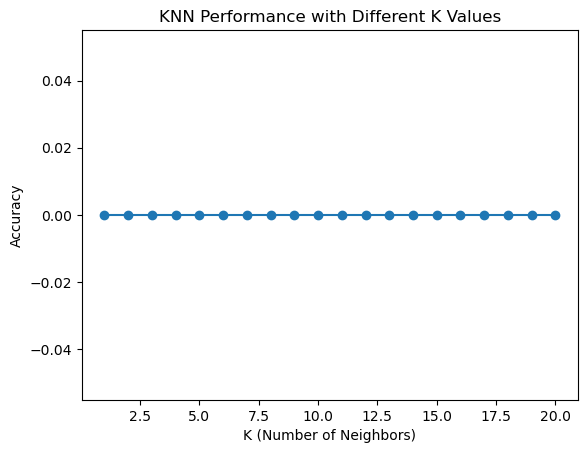

In [196]:
# 다양한 K 값에 대해 성능 평가
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 그래프 시각화
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Performance with Different K Values')
plt.show()

In [197]:
from sklearn.preprocessing import StandardScaler

# 특성 스케일 맞추기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y_train)

KNeighborsClassifier()

In [199]:
y_pred = knn.predict(X_test)

c:\Users\User\anaconda3\envs\hi\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [201]:
from sklearn.metrics import mean_squared_error, r2_score

In [203]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# 분류 보고서 출력 (정밀도, 재현율, F1 점수 포함)
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy: 0.0
Confusion Matrix:
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Classification Report:

c:\Users\User\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\env

In [205]:
from sklearn.tree import DecisionTreeClassifier


y = df['품종']
X = df.loc[ : , ['크기', '지능', '어린이 적합성'] ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [208]:
y_pred = dt.predict(X_test)

In [207]:
y_test

30           보스턴 테리어
0             보더 테리어
22                퍼그
31              브리아드
18      체서피크 베이 리트리버
28       오스트레일리안 테리어
10      저먼 쇼트헤어드 포인터
53             뉴펀들랜드
4       잉글리시 코커 스패니얼
12          티베탄 스패니얼
49           티베탄 테리어
33    카발리에 킹 찰스 스패니얼
68            저먼 셰퍼드
35        플랫코티드 리트리버
69           그레이트 데인
45        댄디 딘몬트 테리어
75           세인트 버나드
Name: 품종, dtype: object

In [211]:
y_pred

array(['복서', '케언 테리어', '올드 잉글리시 쉽독', '고든 세터', '고든 세터', '아펜핀셔',
       '버니즈 마운틴 독', '고든 세터', '잉글리시 스프링거 스패니얼', '웨스트 하이랜드 화이트 테리어 (웨스티)',
       '노퍽 테리어', '웨스트 하이랜드 화이트 테리어 (웨스티)', '로트와일러', '잉글리시 스프링거 스패니얼',
       '그레이하운드', '라사 압소', '불마스티프'], dtype=object)

In [214]:
df.loc[df['품종'] == '케언 테리어',]

,품종,유형,점수,인기순위,지능,선천적질병,어린이를 위한 점수,크기,평생비용,지능순위,지능%,수명(년),유전적 질병의 수,유전적 질병,평균구매가격,연간 사료비용,손질빈도,어린이 적합성,정보링크,이미지
1,케언 테리어,terrier,3.53,48,3,"'lion jaw', heart problems",4.91,0,31949317.84,35,61%,13.84,2,"'lion jaw', heart problems",631954.95,470697.48,Once a week,1,https://en.wikipedia.org/wiki/Cairn_Terrier,https://upload.wikimedia.org/wikipedia/commons...


In [210]:
X_test

,크기,지능,어린이 적합성
30,1,2,1
0,0,3,1
22,1,1,1
31,2,3,1
18,2,3,1
28,0,3,2
10,2,5,1
53,2,3,1
4,1,5,1
12,0,2,1


In [215]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -- ------------------------------------- 7.9/124.9 MB 37.4 MB/s eta 0:00:04
   ----- ---------------------------------- 16.5/124.9 MB 40.0 MB/s eta 0:00:03
   ------- -------------------------------- 23.3/124.9 MB 38.8 MB/s eta 0:00:03
   --------- ------------------------------ 29.4/124.9 MB 35.1 MB/s eta 0:00:03
   ----------- ---------------------------- 36.2/124.9 MB 35.3 MB/s eta 0:00:03
   --------------- ------------------------ 46.9/124.9 MB 37.3 MB/s eta 0:00:03
   ------------------- -------------------- 59.5/124.9 MB 40.8 MB/s eta 0:00:02
   --------------------- ------------------ 66.6/124.9 MB 40.0 MB/s eta 0:00:02
   ------------------------- -------------- 79.2/124.9 MB 42.4 MB/s eta 0:00:02
   ----------------------------- ---------- 91.5/124.9 MB 44.2 MB/s eta 0:00:01
   -------------------------------- ------ 104.1/124.9 MB 45.8 MB/s eta 0:00:01
   ------------------------------------ -- 115.3/1

In [216]:
import xgboost as xgb

In [219]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [221]:
from sklearn.preprocessing import LabelEncoder

In [222]:
encoder = LabelEncoder()

In [224]:
y_encoded = encoder.fit_transform(y)

In [234]:
y_encoded

array([20, 66, 39, 53, 57,  9, 56, 36, 52, 30, 60, 76, 68, 10, 41, 33, 40,
        1, 62, 71,  0, 55, 72, 44, 44, 14, 32, 19, 49, 80, 22, 29, 18, 64,
        7, 79, 16, 77, 38, 24, 74, 67, 75, 47, 70,  8,  3, 34, 48, 69,  4,
        6, 63,  5, 15, 45, 50, 78, 17, 23, 28, 13, 58, 12, 51, 42, 37, 27,
       59,  2, 65, 54, 73, 11, 25, 35, 21, 46, 31, 61, 43, 26])

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [228]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [230]:
y_train

array([58, 50, 74, 30, 31,  9, 34,  7, 37, 75, 45, 40, 24, 13, 61, 36, 26,
       15, 71, 27, 14, 70, 10, 17, 53,  1, 38, 52, 51, 56, 16, 11, 42,  4,
        3, 43, 33, 19, 67, 32, 48, 44, 47, 73, 78, 76, 18, 46, 23, 12, 65,
       77, 80, 66, 63, 55, 39, 44, 21, 25,  0, 28, 54, 41,  6])

In [231]:
X_train

,크기,지능,어린이 적합성
62,2,3,2
56,1,1,1
40,0,5,1
9,1,5,2
78,2,0,2
...,...,...,...
20,2,3,1
60,0,1,3
71,0,1,3
14,2,3,1


In [229]:
xgb_model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63], got [ 0  1  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19 21 23 24 25 26 27 28
 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 52 53 54 55
 56 58 61 63 65 66 67 70 71 73 74 75 76 77 78 80]